# Assignment 4

## Glen Quadros

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
egg_df = pd.read_csv('/content/Egg_Production_2007_2012.csv')

In [3]:
milk_df = pd.read_csv('/content/Milk_Production_2007_2012.csv')

## 1. Merge two data frames such that the new data frame has multi-level columns (like years under milk and eggs). Try to change the column names if required.

In [4]:
egg_df.head()

,States/Uts,2007-08 (In lakh nos.),2008-09 (In lakh nos.),2009-10 (In lakh nos.),2010-11 (In lakh nos.),2011-12 (In lakh nos.)
0,Andhra Pradesh,175884,183446,193958,201277,212103
1,Arunachal Pradesh,394,361,380,407,419
2,Assam,4910,4659,4671,4707,4705
3,Bihar,10707,10740,11002,7446,7552
4,Chhattisgarh,9184,9738,10520,12454,12984


In [5]:
milk_df.head()

,States/Uts,2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,8925,9570,10429,11203,12088
1,Arunachal Pradesh,32,24,26,28,22
2,Assam,752,753,756,790,796
3,Bihar,5783,5934,6124,6517,6643
4,Chhattisgarh,866,908,956,1029,1119


In [6]:
egg_df = egg_df.set_index('States/Uts')

In [7]:
milk_df = milk_df.set_index('States/Uts')

In [8]:
columns1 = [('Milk','2007-08'),('Milk','2008-09'),('Milk','2009-10'),('Milk','2010-11'),('Milk','2011-12')]
columns2 = [('Eggs','2007-08 (In lakh nos.)'),('Eggs','2008-09 (In lakh nos.)'),('Eggs','2009-10 (In lakh nos.)'),('Eggs','2010-11 (In lakh nos.)'),('Eggs','2011-12 (In lakh nos.)')]

In [9]:
egg_df.columns = pd.MultiIndex.from_tuples(columns2)

In [10]:
milk_df.columns = pd.MultiIndex.from_tuples(columns1)

In [11]:
df = milk_df.join(egg_df)

In [12]:
df.head()

Milk                                  \
                  2007-08 2008-09 2009-10 2010-11 2011-12   
States/Uts                                                  
Andhra Pradesh       8925    9570   10429   11203   12088   
Arunachal Pradesh      32      24      26      28      22   
Assam                 752     753     756     790     796   
Bihar                5783    5934    6124    6517    6643   
Chhattisgarh          866     908     956    1029    1119   

                                    Eggs                         \
                  2007-08 (In lakh nos.) 2008-09 (In lakh nos.)   
States/Uts                                                        
Andhra Pradesh                  175884.0               183446.0   
Arunachal Pradesh                  394.0                  361.0   
Assam                             4910.0                 4659.0   
Bihar                            10707.0                10740.0   
Chhattisgarh                      9184.0                 9738.0   

                                                                 \
                  2009-10 (In lakh nos.) 2010-11 (In lakh nos.)   
States/Uts                                                        
Andhra Pradesh                  193958.0               201277.0   
Arunachal Pradesh                  380.0                  407.0   
Assam                             4671.0                 4707.0   
Bihar                            11002.0                 7446.0   
Chhattisgarh                     10520.0                12454.0   

                                          
                  2011-12 (In lakh nos.)  
States/Uts                                
Andhra Pradesh                  212103.0  
Arunachal Pradesh                  419.0  
Assam                             4705.0  
Bihar                             7552.0  
Chhattisgarh                     12984.0

## 2. Present the production of milk in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab on 2007-2008 as a Pie chart. The pie chart should consist of proportion in percentage and labels for each piece.

In [13]:
places = ["Gujarat","Kerala","Andhra Pradesh","Uttar Pradesh","Punjab"]

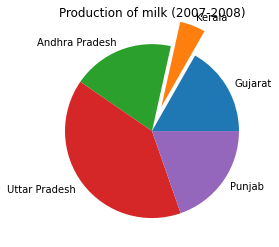

In [31]:
plt.title('Production of milk (2007-2008)')

pie = df.iloc[:,0:1]
pie = pie.filter(items=places,axis=0)
pie = pie.T
x = pie.values.flatten()
plt.pie(x, labels=places, explode=[0,0.3,0,0,0])
plt.show()

## 3. Plot five pie charts of egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab for the five years range. Each pie chart should represent the proportional egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab for a given year.

Text(0.5, 1.0, '2011-12')

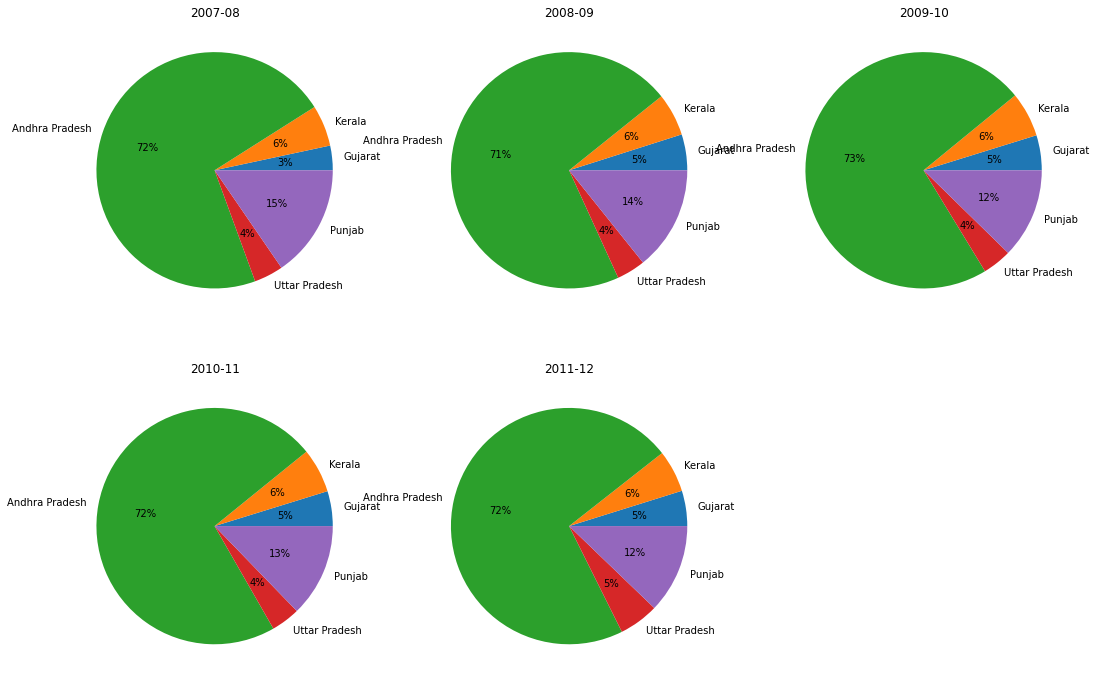

In [37]:
pie1 = egg_df.filter(items=places, axis=0)
pie1 = pie1.T
vals = pie1.T.values

fig, axes = plt.subplots(2,3,figsize=(18,12))
fig.delaxes(axes[1][2])
axes[0][0].pie(pie1.loc[("Eggs","2007-08 (In lakh nos.)")].values, labels=places, autopct='%.0f%%')
axes[0,0].set_title("2007-08")
axes[0][1].pie(pie1.loc[("Eggs","2008-09 (In lakh nos.)")].values, labels=places, autopct='%.0f%%')
axes[0,1].set_title("2008-09")
axes[0][2].pie(pie1.loc[("Eggs","2009-10 (In lakh nos.)")].values, labels=places, autopct='%.0f%%')
axes[0,2].set_title("2009-10")
axes[1][0].pie(pie1.loc[("Eggs","2010-11 (In lakh nos.)")].values, labels=places, autopct='%.0f%%')
axes[1,0].set_title("2010-11")
axes[1][1].pie(pie1.loc[("Eggs","2011-12 (In lakh nos.)")].values, labels=places, autopct='%.0f%%')
axes[1,1].set_title("2011-12")

## 4. Plot Stacked Area Chart that represents the proportional egg production state wise over five years. There would be five stacked colors for Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh

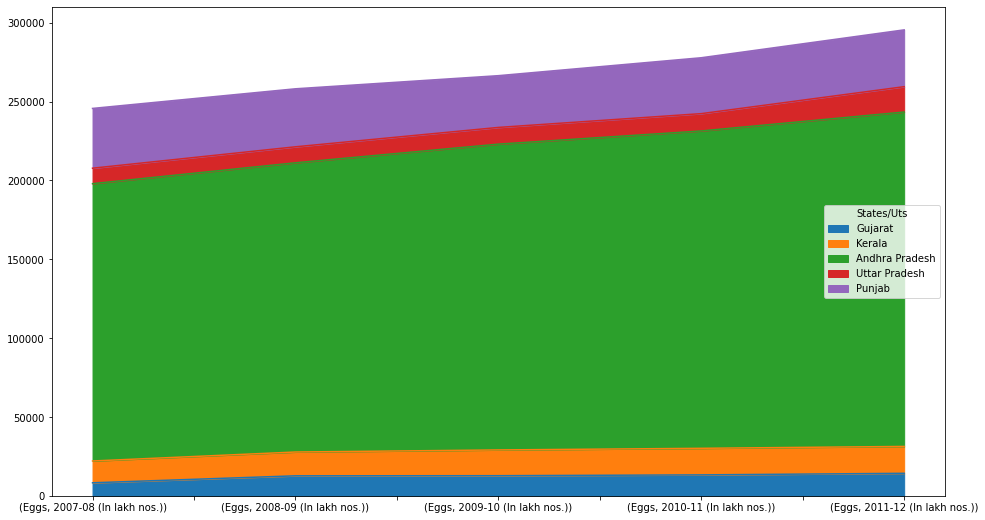

In [40]:
pie1.plot(kind='area', stacked=True, figsize=(16,9))